# Distortion correction

In Below function based on the number of inner corners on the chessboard, I prepare the "object points", which are the (x, y, z) coordinates of where the chessboard corners are in the real world 

lets import all the library to correct the distortion image

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os.path as path


In [2]:
def distortionCorrection(calib_images_dir):
       # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6 * 9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(path.join(calib_images_dir, 'calibration*.jpg'))

    # Step through the list and search for chessboard corners
    for filename in images:

        img = cv2.imread(filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        pattern_found, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        if pattern_found is True:
            objpoints.append(objp)
            imgpoints.append(corners)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    return ret, mtx, dist, rvecs, tvecs

Now using undistort function we will undistort the images from the camera

In [3]:
def undistort(frame, mtx, dist):

    frame_undistorted = cv2.undistort(frame, mtx, dist, newCameraMatrix=mtx)
    return frame_undistorted

Below function will show the correct image using above function

In [4]:
def showDisortImageToCorrectImage():
    ret, mtx, dist, rvecs, tvecs = distortionCorrection(calib_images_dir='camera_cal')
    img = cv2.imread('camera_cal/calibration1.jpg')
    img_undistorted = undistort(img, mtx, dist)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    f.tight_layout()
    ax1.imshow(img)
    ax1.plot(580   , 173, '.')
    ax1.plot(577 , 274 , '.')
    ax1.plot(457, 269, '.')
    ax1.plot(463, 160, '.')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(img_undistorted)
    ax2.set_title('Undistorted and Warped Image', fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

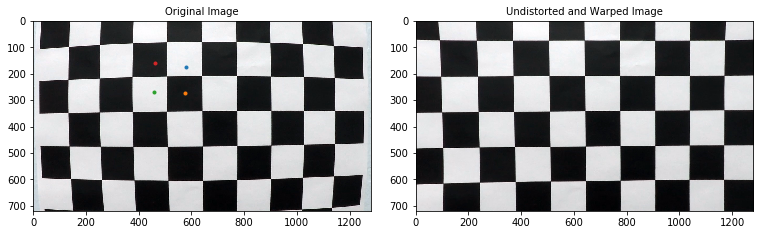

In [5]:
showDisortImageToCorrectImage()

In [6]:
ret, mtx, dist, rvecs, tvecs = distortionCorrection(calib_images_dir='camera_cal')
img = cv2.imread('test_images/test2.jpg')
img_undistorted = undistort(img, mtx, dist)
cv2.imwrite('img/test_calibration_before.jpg', img)
cv2.imwrite('img/test_calibration_after.jpg', img_undistorted)

True